# DFT Processing Gain

There are two types of processing gains associated with the DFT. One is simply know as *processing gain*, which is the inherent correlation gain that takes place in an $N$-point DFT. The *processing gain* of a single DFT is a function of the number of input samples $N$. It can be useful to think of each DFT bin as a bandpass filter for frequencies near the bin center. As the number of input samples increases, the gain of the bandpass filter increases and the bandwidth of the filter decreases. The other type of processing gain is the *integration gain* that is possible when the output of multiple DFT's are averaged together. It is possible in theory to increase the number of samples used to calculate the DFT, but the number of multiplications required to calculate the DFT increases proporionally to $N^2$, so this is not computationally efficient in practice. 

We can quantify the idea of DFT *processing gain* by defining a signal-to-noise ratio (SNR), as the ratio of the DFT's *output signal-power level* to the *average output noise-power level*. In practice we see that the DFT's output SNR will increase as $N$ increases. This is due to the fact that a DFT bins output noise standard deviation (RMS) value is proportional to $\sqrt N$, and the DFT's output magnitude for a signal close to bin center is proportional to $N$. In general, for real inputs when $N > N'$, an $N$-point DFT's output ${SNR}_N$ increase over an $N'$- point DFT's ${SNR}_{N'}$ by the following relationship:

$${SNR}_N = {SNR}_{N'} + 10 \, {log}_{10} \left(\frac{N}{N'}\right) dB$$

When the DFT size increases by a factor of $2N$, the processing gain increases by *approximately* 3 dB (approximate since noise variation is random in nature). This is illustrated in the example below.

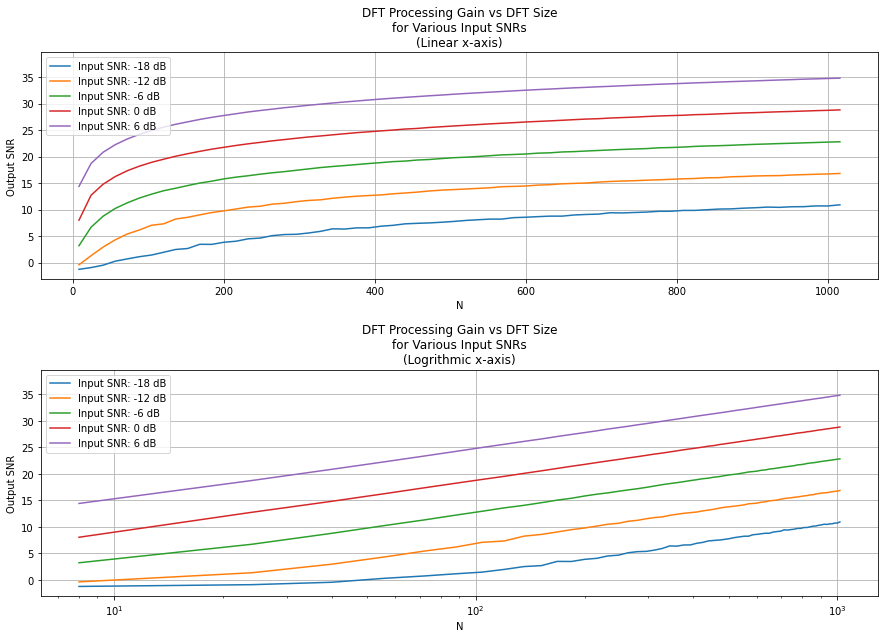

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Sinusoidal input parameters
A0_db = 0
A0 = 10**(A0_db/20)
k = 1
theta = 0

# Number of tests to average over
n_tests = 1000

# DFT sizes calculate SNR for
N_arr = np.arange(8, 1025, 16)

# Input signal to noise ratios to tests
input_snr_db_arr = np.array([-18, -12, -6, 0, 6])

# Array to hold SNR calculations
snr_arr = np.empty((len(N_arr), len(input_snr_db_arr), n_tests))

# Capture several output SNRs using various input SNRs and DFT sizes 
for N_idx, N in enumerate(N_arr):
    for input_snr_db_idx, input_snr_db in enumerate(input_snr_db_arr):
        for test in range(n_tests):

            # Calculate input SNR amplitude
            input_snr = 10**(input_snr_db/20)

            # Calculate the noise level
            An = A0/input_snr

            # Generate input signal with noise
            n = np.arange(0, N)
            x_signal = A0 * np.sin(2*np.pi*k*n/N + theta)
            x_noise = An * (np.random.rand(N)*2 - 1)
            x_in = x_signal + x_noise

            # Calculate the FFT of the input
            x_fft = fft(x_in)

            # Set the signal bin to be the closest bin to the actual signal
            m = int(round(k))

            # Calculate the signal power
            signal = np.abs(x_fft[m])**2

            # Calculate the noise power
            noise = np.mean(np.abs(x_fft[(n!=m) & (n<N/2)])**2)

            # Calculate the SNR and add it to the SNR array
            snr = 10 * np.log10((signal / noise))
            snr_arr[N_idx][input_snr_db_idx][test] = snr


# Plot the average SNR over all the tests for each Input SNR and DFT length combination
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,10))
y_lim_top = (10*np.log10(N/2) + np.max(input_snr_db_arr)) * 1.2

# Linear x axis
ax[0].grid()
ax[0].plot(N_arr, np.mean(snr_arr, axis=2))
ax[0].set_xlabel('N')
ax[0].set_ylabel('Output SNR')
ax[0].set_title('DFT Processing Gain vs DFT Size\nfor Various Input SNRs\n(Linear x-axis)')
ax[0].set_ylim(top=y_lim_top)
ax[0].legend(['Input SNR: {} dB'.format(input_snr_db) for input_snr_db in input_snr_db_arr])

# Logrithmic x axis
ax[1].grid()
ax[1].plot(N_arr, np.mean(snr_arr, axis=2))
ax[1].set_xscale('log')
ax[1].set_xlabel('N')
ax[1].set_ylabel('Output SNR')
ax[1].set_title('DFT Processing Gain vs DFT Size\nfor Various Input SNRs\n(Logrithmic x-axis)')
ax[1].set_ylim(top=y_lim_top)
ax[1].legend(['Input SNR: {} dB'.format(input_snr_db) for input_snr_db in input_snr_db_arr])

plt.subplots_adjust(hspace=0.4)
pass